In [40]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np # For data management
import pandas as pd # For data management

import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

from sklearn import datasets # To import the sample dataset
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

<h1>Customer 2009</h1>

In [41]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Customer_2009_subset.csv', sep=',', index_col=0)
df

,avgSpent,Nsessions,avgItemSession
Customer ID,,,
12346.0,3.800,5,5.2
12358.0,35.890,1,91.0
12359.0,48.570,2,97.0
12417.0,23.575,2,74.5
12422.0,6.650,1,60.0
...,...,...,...
18268.0,37.170,1,142.0
18271.0,26.550,1,44.0
18275.0,20.650,1,128.0


<h2>Variables standardization</h2>


<p>xstd = è il vettore standardizzato
x = è il vettore da standardizzare
μ = è la media della variabile
σ = è la deviazione standard della stessa variabile </p>

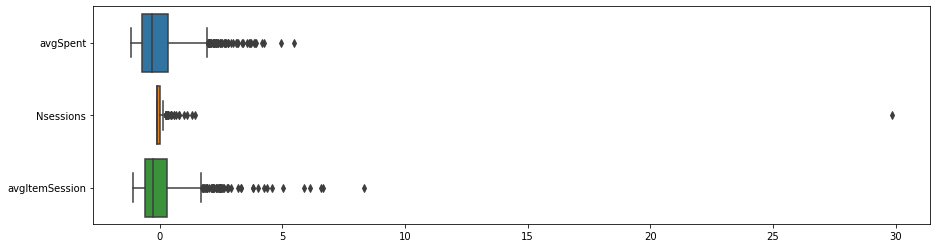

In [42]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_dataframe = pd.DataFrame( scaled_array, columns = df.columns )
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [43]:
scaled_dataframe.describe()

,avgSpent,Nsessions,avgItemSession
count,9.090000e+02,9.090000e+02,9.090000e+02
mean,-1.194421e-16,-3.728530e-16,6.128211e-17
std,1.000551e+00,1.000551e+00,1.000551e+00
min,-1.156054e+00,-8.893795e-02,-1.096040e+00
25%,-7.004307e-01,-8.893795e-02,-6.114239e-01
50%,-2.938453e-01,-8.893795e-02,-2.500151e-01
75%,3.607404e-01,2.075621e-02,3.023652e-01
max,5.466733e+00,2.985757e+01,8.317014e+00


<p>Il DBSCAN è un algoritmo di clustering che fa parte della categoria dei cosiddetti density-based: individua zone dello spazio delle feature in cui la densità dei puntiè maggiore. 
Tutte quelle osservazioni vicine tra loro vengono raggruppate in un cluster. Quelle che invece sembrano isolate sono etichettate come noise o rumore.
Il DBSCAN necessita di due iperparametri:

ε : che corrisponde alla distanza all'interno della quale ricercare punti vicini
n : che corrisponde al numero minimo di punti affinchè si formi un cluster
    
DBSCAN cerca tutti quei cluster i cui punti sono un numero maggiore o uguale ad n e distanti tra loro meno di ε.

</p>

In [44]:
df.shape

(909, 3)

<p> Inizializzo il DBSCAN</p>

In [45]:
dbscan_model = DBSCAN( eps = 0.2, min_samples = 10)

<h3>Fitting</h3>

In [46]:
clusters_customers=dbscan_model.fit(scaled_dataframe)


In [47]:
labels = dbscan_model.labels_
labels

array([-1,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  2, -1, -1,  0,  0, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1,  0,  0, -1,  2,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

In [48]:
df["LABEL"] = labels

In [49]:
df.head()

,avgSpent,Nsessions,avgItemSession,LABEL
Customer ID,,,,
12346.0,3.800,5,5.2,-1
12358.0,35.890,1,91.0,0
12359.0,48.570,2,97.0,0
12417.0,23.575,2,74.5,0
12422.0,6.650,1,60.0,0


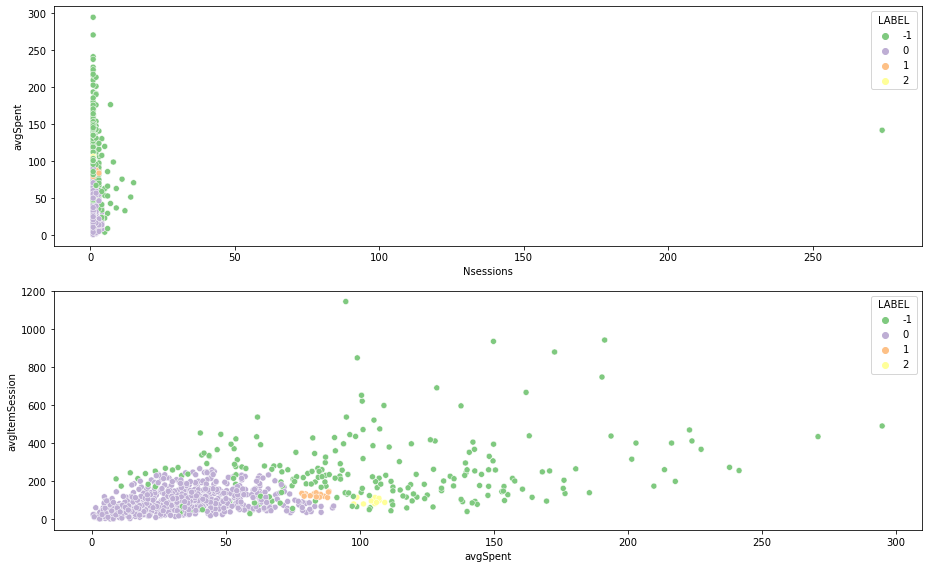

In [50]:
fig, ((ax1, ax2)) = plt.subplots(2, figsize = (13,8))

sns.scatterplot(x = "Nsessions", y = "avgSpent", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "avgSpent", y = "avgItemSession", data = df, hue = "LABEL", palette = "Accent", ax = ax2)


plt.tight_layout()
plt.show()

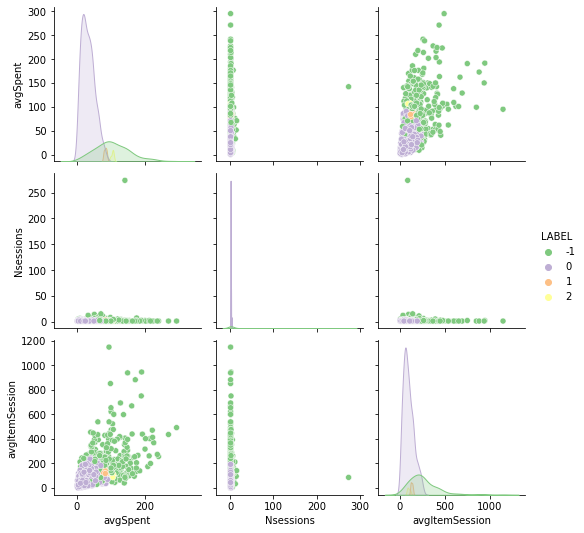

In [51]:
sns.pairplot(data = df, hue = "LABEL", palette = "Accent")
plt.show()

<h3> Evaluation Performance </h3>

In [52]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [53]:
#Verrà eseguita prima la clusterizzazione e poi il calcolo delle metriche:
#Distanza media tra i noise points e i 6 punti più vicini (6-NN)
#Numero di cluster che vengono individuati 

def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [54]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)


In [55]:
#grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_dataframe, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.296   13
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.233    4
  3 | Tested with eps = 0.1 and min_samples =  15 |   0.2    1
  4 | Tested with eps = 0.1 and min_samples =  20 | 0.185    2
  5 | Tested with eps = 0.1 and min_samples =  25 | 0.178    0
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.178    0
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.178    0
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.178    0
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.178    0
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.653    7
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.472    3
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.368    1
 13 | Tested with eps = 0.2 and min_samples =  20 | 0.332    1
 14 | Tested with eps = 0.2 and min_samples =  25

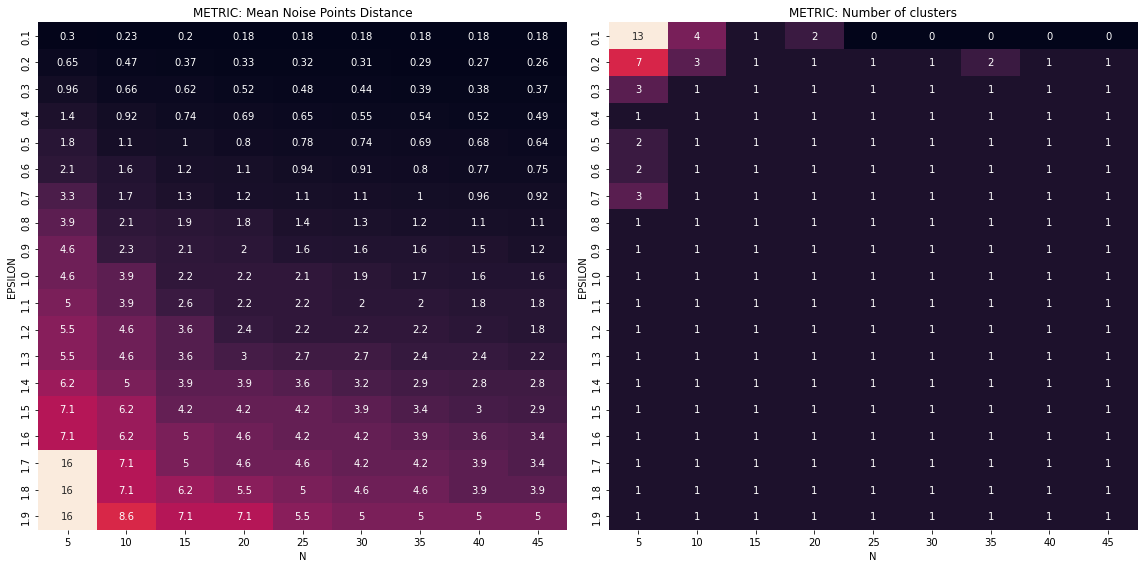

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [57]:
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])

<BarContainer object of 3 artists>

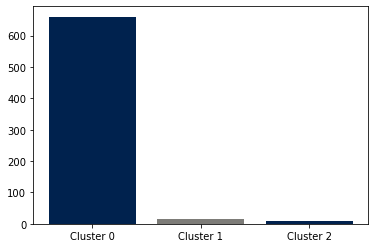

In [58]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2])], color=['#00224e','#7d7c78','#01224e'])

In [59]:
clust_list

[             avgSpent  Nsessions  avgItemSession  LABEL
 Customer ID                                            
 12358.0        35.890          1            91.0      0
 12359.0        48.570          2            97.0      0
 12417.0        23.575          2            74.5      0
 12422.0         6.650          1            60.0      0
 12440.0        45.610          1           251.0      0
 ...               ...        ...             ...    ...
 18268.0        37.170          1           142.0      0
 18271.0        26.550          1            44.0      0
 18275.0        20.650          1           128.0      0
 18276.0        24.700          1           192.0      0
 18286.0        50.000          1           108.0      0
 
 [660 rows x 4 columns],
               avgSpent  Nsessions  avgItemSession  LABEL
 Customer ID                                             
 15005.0      88.436667          3      145.666667      1
 15031.0      86.580000          1      121.000000      1


<h3> ALTRO METODO </h3>

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

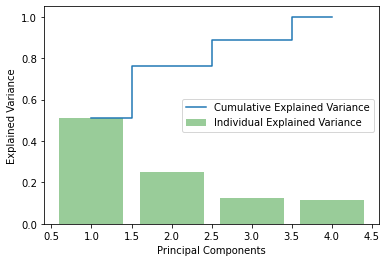

In [61]:
scaler = StandardScaler()
std_cust = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_cust)

plt.step(range(1, df.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');


In [64]:
pca = PCA(n_components=2)
pca_customer_profile = pca.fit_transform(std_cust)

<p>The graph shows the amount of variance captured depending on the number of components we include. A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 2 components.
</p>

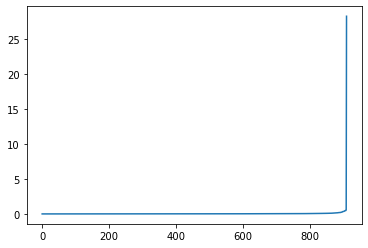

In [65]:
knn = NearestNeighbors(n_neighbors=6)
nbrs = knn.fit(pca_customer_profile)
distances, indices = nbrs.kneighbors(pca_customer_profile)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances);

plt.savefig('D:/Desktop/DataMining/cust_knn.png')

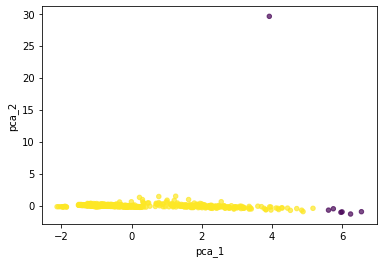

In [66]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
clusters_customers = dbscan.fit_predict(pca_customer_profile)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

plt.savefig('D:/Desktop/DataMining/cust_dbscan.png')

In [67]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

,-1,0
CustomersNb,7,902


In [68]:
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])

<BarContainer object of 3 artists>

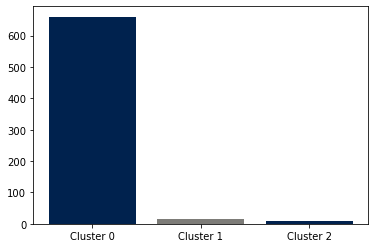

In [69]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2])], color=['#00224e','#7d7c78','#01224e'])

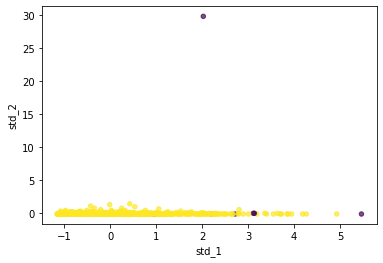

In [70]:
#no pca
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_cust[:, 0], std_cust[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [71]:
customer_profile_dbscan = df.copy(deep=True)
customer_profile_dbscan['cluster'] = clusters_customers
customer_profile_dbscan['cluster'] = customer_profile_dbscan['cluster']
customer_profile_dbscan

,avgSpent,Nsessions,avgItemSession,LABEL,cluster
Customer ID,,,,,
12346.0,3.800,5,5.2,-1,0
12358.0,35.890,1,91.0,0,0
12359.0,48.570,2,97.0,0,0
12417.0,23.575,2,74.5,0,0
12422.0,6.650,1,60.0,0,0
...,...,...,...,...,...
18268.0,37.170,1,142.0,0,0
18271.0,26.550,1,44.0,0,0
18275.0,20.650,1,128.0,0,0


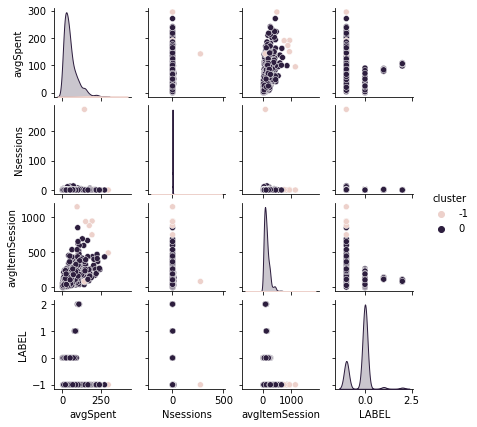

In [72]:
sns.pairplot(customer_profile_dbscan, hue='cluster', diag_kind='kde', height=1.5);

<h1>Customer 2010</h1>

In [73]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Customer_2010_subset_2.csv', sep=',', index_col=0)
df

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap
Customer ID,,,,,,,,
12346.0,31.226667,6,142.31,4.50,25,7.333333,6,33.0
12347.0,74.150000,2,87.69,60.61,67,379.500000,10,111.0
12348.0,8.295000,2,14.39,2.20,20,234.500000,12,80.0
12349.0,138.495000,2,163.76,113.23,77,457.000000,10,182.0
12351.0,36.710000,1,36.71,36.71,20,260.000000,11,0.0
...,...,...,...,...,...,...,...,...
18285.0,24.200000,1,24.20,24.20,8,58.000000,2,0.0
18286.0,111.890000,1,111.89,111.89,45,417.000000,8,0.0
18287.0,37.425000,4,100.45,5.10,62,182.750000,11,63.0


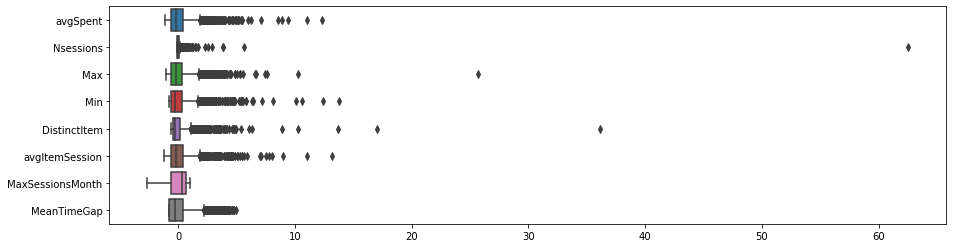

In [74]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_dataframe = pd.DataFrame( scaled_array, columns = df.columns )
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [75]:
scaled_dataframe.describe()

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap
count,4.070000e+03,4.070000e+03,4.070000e+03,4.070000e+03,4.070000e+03,4.070000e+03,4.070000e+03,4.070000e+03
mean,1.939958e-16,-6.042123e-17,4.940083e-17,1.763536e-16,2.189076e-17,1.147321e-16,-2.476861e-16,8.592635e-18
std,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00
min,-1.178816e+00,-1.012692e-01,-1.076528e+00,-8.387965e-01,-6.303170e-01,-1.190979e+00,-2.648016e+00,-8.003597e-01
25%,-6.441099e-01,-1.012692e-01,-6.225931e-01,-6.604150e-01,-4.646847e-01,-6.298815e-01,-6.494825e-01,-8.003597e-01
50%,-2.427282e-01,-7.308311e-02,-2.435502e-01,-2.999699e-01,-2.548838e-01,-2.420639e-01,3.497843e-01,-2.828171e-01
75%,3.648017e-01,1.147529e-02,3.414269e-01,2.844360e-01,1.536758e-01,3.520397e-01,6.828732e-01,3.849797e-01
max,1.229869e+01,6.255651e+01,2.569143e+01,1.374101e+01,3.614005e+01,1.313352e+01,1.015962e+00,4.925998e+00


In [76]:
dbscan_model = DBSCAN( eps = 0.6, min_samples = 10)

In [77]:
dbscan_model.fit(scaled_dataframe)

DBSCAN(eps=0.6, min_samples=10)

In [78]:
labels = dbscan_model.labels_
labels

array([-1, -1, -1, ...,  0, -1,  0], dtype=int64)

In [79]:
df["LABEL"] = labels

In [80]:
df

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap,LABEL
Customer ID,,,,,,,,,
12346.0,31.226667,6,142.31,4.50,25,7.333333,6,33.0,-1
12347.0,74.150000,2,87.69,60.61,67,379.500000,10,111.0,-1
12348.0,8.295000,2,14.39,2.20,20,234.500000,12,80.0,-1
12349.0,138.495000,2,163.76,113.23,77,457.000000,10,182.0,-1
12351.0,36.710000,1,36.71,36.71,20,260.000000,11,0.0,0
...,...,...,...,...,...,...,...,...,...
18285.0,24.200000,1,24.20,24.20,8,58.000000,2,0.0,0
18286.0,111.890000,1,111.89,111.89,45,417.000000,8,0.0,-1
18287.0,37.425000,4,100.45,5.10,62,182.750000,11,63.0,0


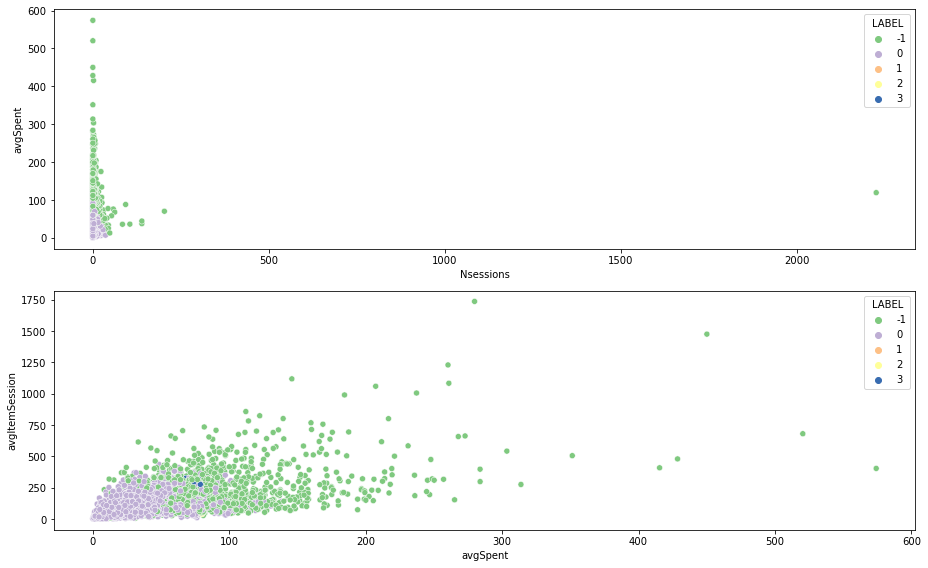

In [81]:
fig, ((ax1, ax2)) = plt.subplots(2, figsize = (13,8))

sns.scatterplot(x = "Nsessions", y = "avgSpent", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "avgSpent", y = "avgItemSession", data = df, hue = "LABEL", palette = "Accent", ax = ax2)


plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data = df, hue = "LABEL", palette = "Accent")
plt.show()

<h3> Evaluation Performance </h3>

In [83]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [84]:
#grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_dataframe, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.527   17
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.514    0
  3 | Tested with eps = 0.1 and min_samples =  15 | 0.514    0
  4 | Tested with eps = 0.1 and min_samples =  20 | 0.514    0
  5 | Tested with eps = 0.1 and min_samples =  25 | 0.514    0
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.514    0
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.514    0
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.514    0
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.514    0
 10 | Tested with eps = 0.2 and min_samples =   5 |  0.57   30
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.536   14
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.516    1
 13 | Tested with eps = 0.2 and min_samples =  20 | 0.514    0
 14 | Tested with eps = 0.2 and min_samples =  25

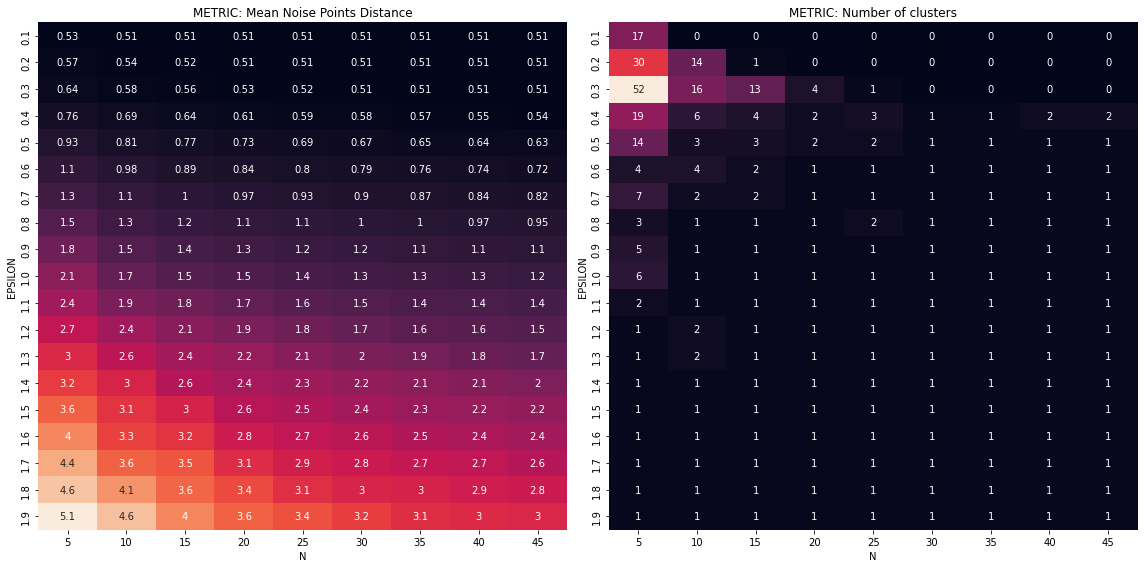

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [86]:
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])

<BarContainer object of 4 artists>

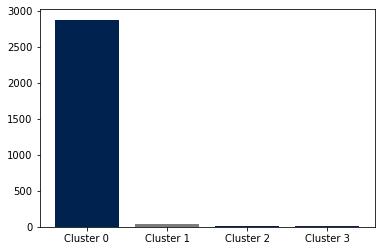

In [87]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2]),len(clust_list[3])], color=['#00224e','#7d7c78','#01224e','#11224e'])

<h3> ALTRO METODO </h3>

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

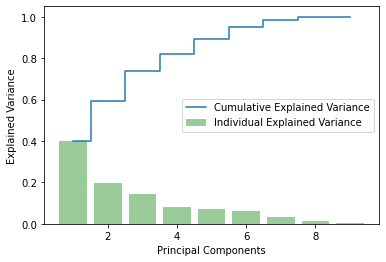

In [89]:
scaler = StandardScaler()
std_cust = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_cust)

plt.step(range(1, df.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');


In [90]:
pca = PCA(n_components=2)
pca_customer_profile = pca.fit_transform(std_cust)

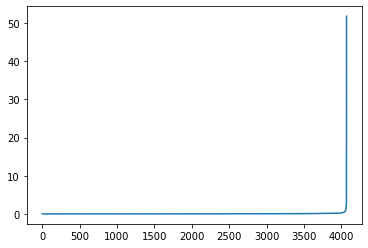

In [91]:
knn = NearestNeighbors(n_neighbors=6)
nbrs = knn.fit(pca_customer_profile)
distances, indices = nbrs.kneighbors(pca_customer_profile)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances);

plt.savefig('D:/Desktop/DataMining/cust_knn.png')

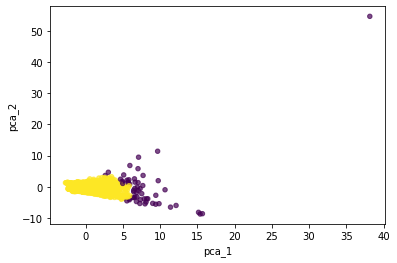

In [92]:
dbscan = DBSCAN(eps=0.8, min_samples=15)
clusters_customers = dbscan.fit_predict(pca_customer_profile)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

plt.savefig('D:/Desktop/DataMining/cust_dbscan_2010.png')

In [93]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

,-1,0
CustomersNb,56,4014


In [94]:
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])

<BarContainer object of 4 artists>

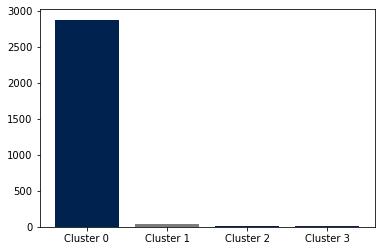

In [95]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2]),len(clust_list[3])], color=['#00224e','#7d7c78','#01224e','#11224e'])

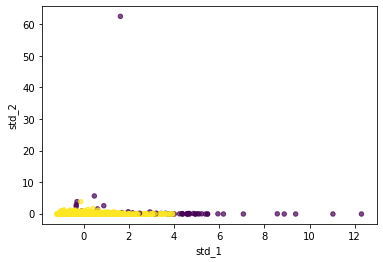

In [96]:
#no pca
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_cust[:, 0], std_cust[:, 1], c=clusters_customers, s=20, alpha=0.7);

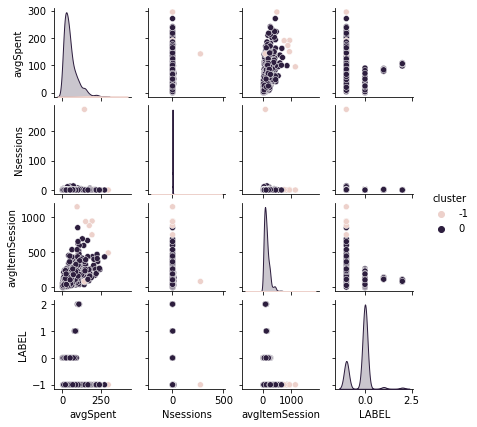

In [97]:
sns.pairplot(customer_profile_dbscan, hue='cluster', diag_kind='kde', height=1.5);

<h1>Customer 2011</h1>

In [98]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Customer_2011_subset_2.csv', sep=',', index_col=0)
df

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap
Customer ID,,,,,,,,
12347.0,51.731667,6,92.67,13.54,82,275.333333,10,55.600000
12348.0,0.850000,2,0.85,0.85,2,22.000000,5,99.000000
12349.0,200.750000,1,200.75,200.75,64,547.000000,11,0.000000
12350.0,25.300000,1,25.30,25.30,16,196.000000,2,0.000000
12352.0,30.644286,7,53.20,12.55,50,71.714286,9,44.666667
...,...,...,...,...,...,...,...,...
18281.0,5.460000,1,5.46,5.46,5,52.000000,12,0.000000
18282.0,11.925000,2,13.08,10.77,8,25.500000,5,85.000000
18283.0,70.714375,16,124.18,1.25,259,84.562500,11,20.733333


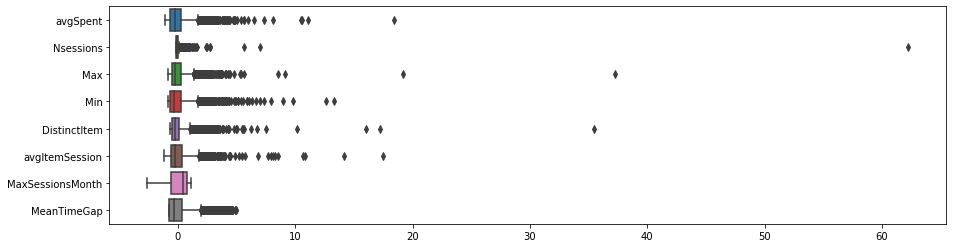

In [99]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_dataframe = pd.DataFrame( scaled_array, columns = df.columns )
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [100]:
scaled_dataframe.describe()

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap
count,4.082000e+03,4.082000e+03,4.082000e+03,4.082000e+03,4.082000e+03,4.082000e+03,4.082000e+03,4.082000e+03
mean,1.237510e-16,7.934001e-17,-8.061492e-17,1.245125e-16,-6.027080e-17,3.129948e-16,-2.795956e-17,3.055017e-17
std,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00
min,-1.101294e+00,-1.141326e-01,-8.420470e-01,-8.547649e-01,-6.182893e-01,-1.131752e+00,-2.577314e+00,-7.663837e-01
25%,-6.248354e-01,-1.141326e-01,-5.058942e-01,-6.532187e-01,-4.723146e-01,-6.151343e-01,-5.667529e-01,-7.663837e-01
50%,-2.517625e-01,-7.903998e-02,-2.143340e-01,-3.088157e-01,-2.701959e-01,-2.387413e-01,4.385275e-01,-2.892936e-01
75%,3.175473e-01,-8.854816e-03,2.391741e-01,2.960831e-01,1.452704e-01,3.590592e-01,7.736209e-01,3.375260e-01
max,1.845803e+01,6.224538e+01,3.724317e+01,1.329754e+01,3.545991e+01,1.752553e+01,1.108714e+00,4.958697e+00


In [101]:
dbscan_model = DBSCAN( eps = 0.7, min_samples = 5)

In [102]:
dbscan_model.fit(scaled_dataframe)

DBSCAN(eps=0.7)

In [103]:
labels = dbscan_model.labels_
labels

array([ 0,  0, -1, ...,  0,  0, -1], dtype=int64)

In [104]:
df["LABEL"] = labels

In [105]:
df.head()

,avgSpent,Nsessions,Max,Min,DistinctItem,avgItemSession,MaxSessionsMonth,MeanTimeGap,LABEL
Customer ID,,,,,,,,,
12347.0,51.731667,6,92.67,13.54,82,275.333333,10,55.600000,0
12348.0,0.850000,2,0.85,0.85,2,22.000000,5,99.000000,0
12349.0,200.750000,1,200.75,200.75,64,547.000000,11,0.000000,-1
12350.0,25.300000,1,25.30,25.30,16,196.000000,2,0.000000,0
12352.0,30.644286,7,53.20,12.55,50,71.714286,9,44.666667,0


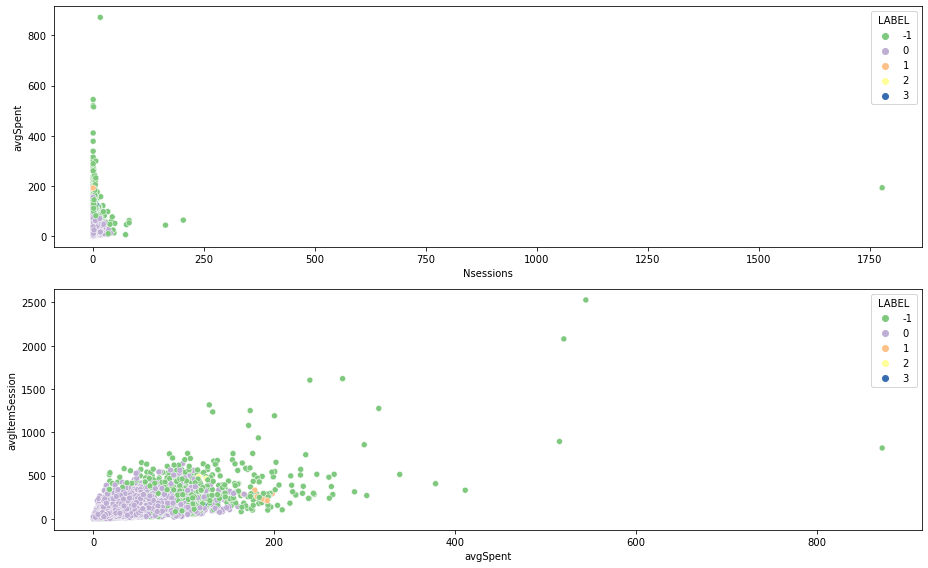

In [106]:
fig, ((ax1, ax2)) = plt.subplots(2, figsize = (13,8))

sns.scatterplot(x = "Nsessions", y = "avgSpent", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "avgSpent", y = "avgItemSession", data = df, hue = "LABEL", palette = "Accent", ax = ax2)


plt.tight_layout()
plt.show()

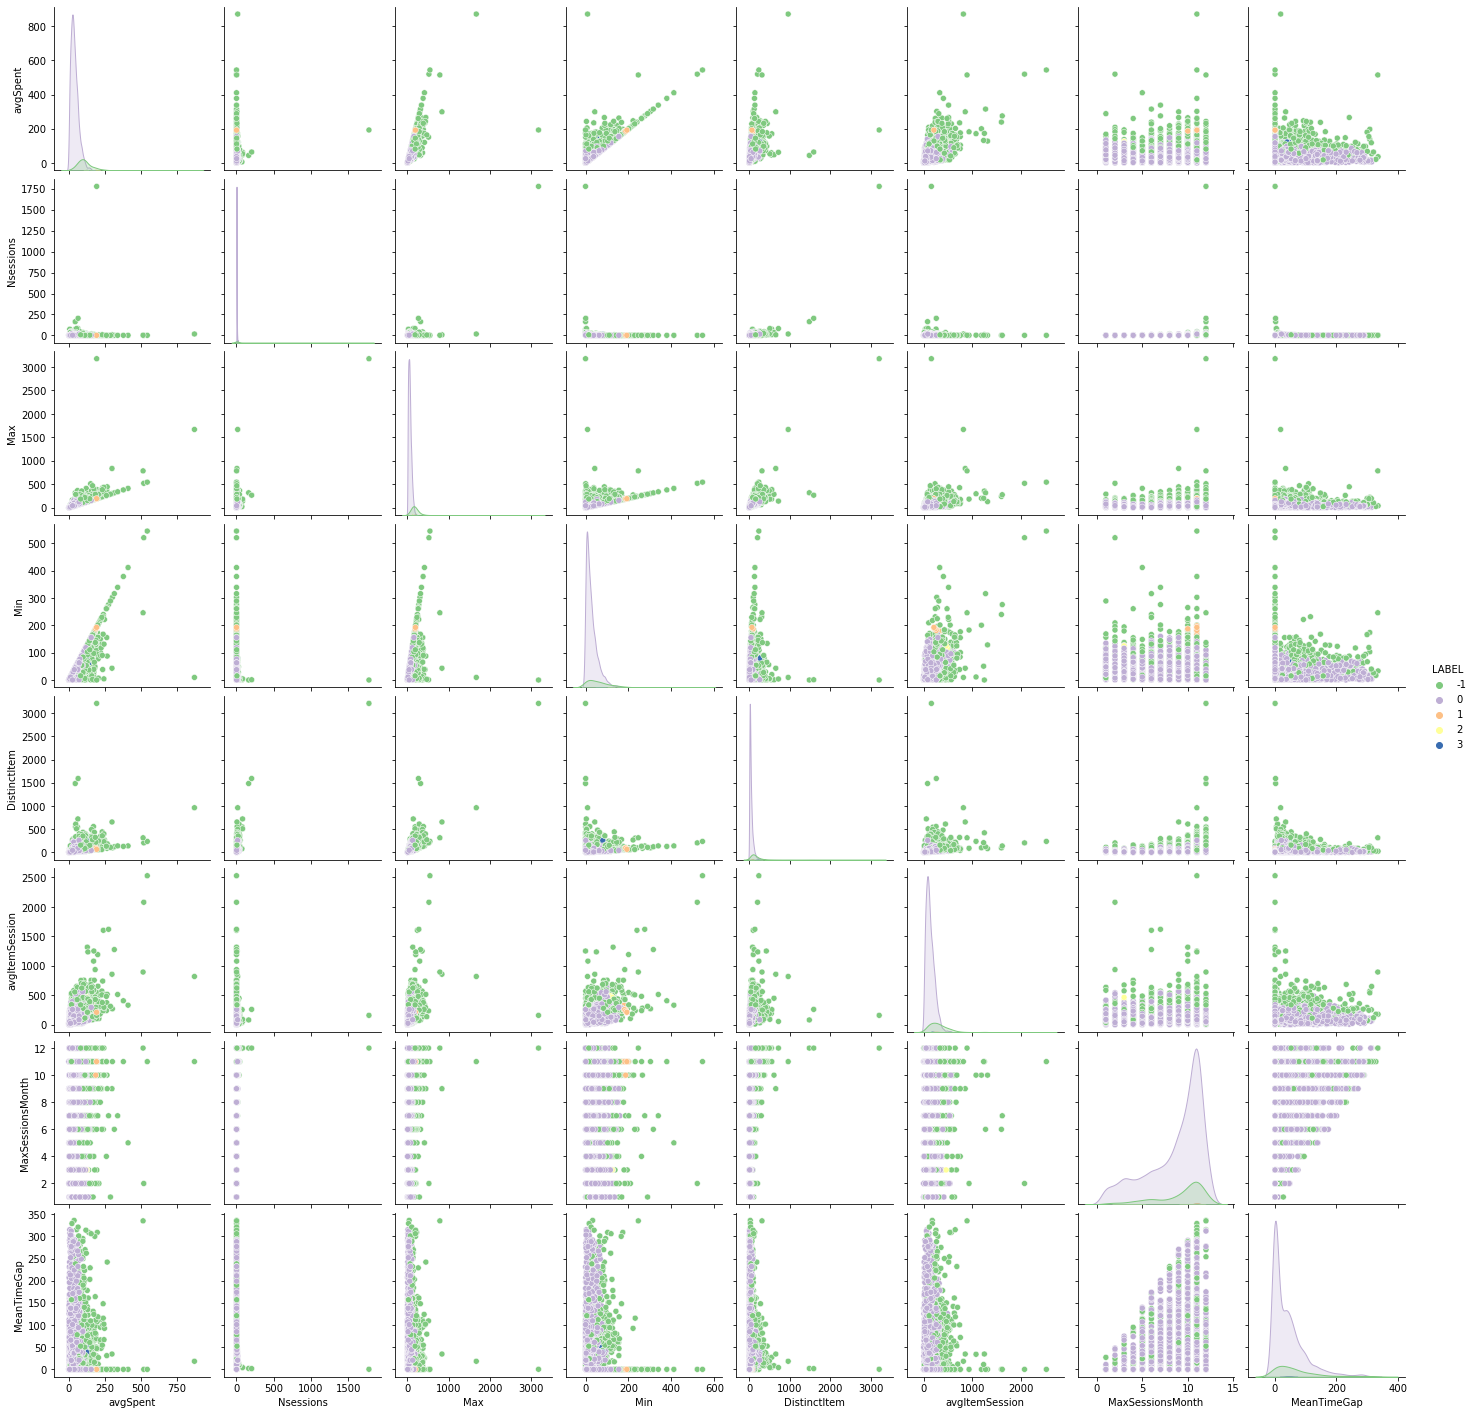

In [107]:
sns.pairplot(data = df, hue = "LABEL", palette = "Accent")
plt.show()

<h3> Evaluation Performance </h3>

In [108]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [109]:
#grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_dataframe, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.512   23
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.496    1
  3 | Tested with eps = 0.1 and min_samples =  15 | 0.495    0
  4 | Tested with eps = 0.1 and min_samples =  20 | 0.495    0
  5 | Tested with eps = 0.1 and min_samples =  25 | 0.495    0
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.495    0
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.495    0
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.495    0
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.495    0
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.572   36
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.527   12
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.505    4
 13 | Tested with eps = 0.2 and min_samples =  20 | 0.498    1
 14 | Tested with eps = 0.2 and min_samples =  25

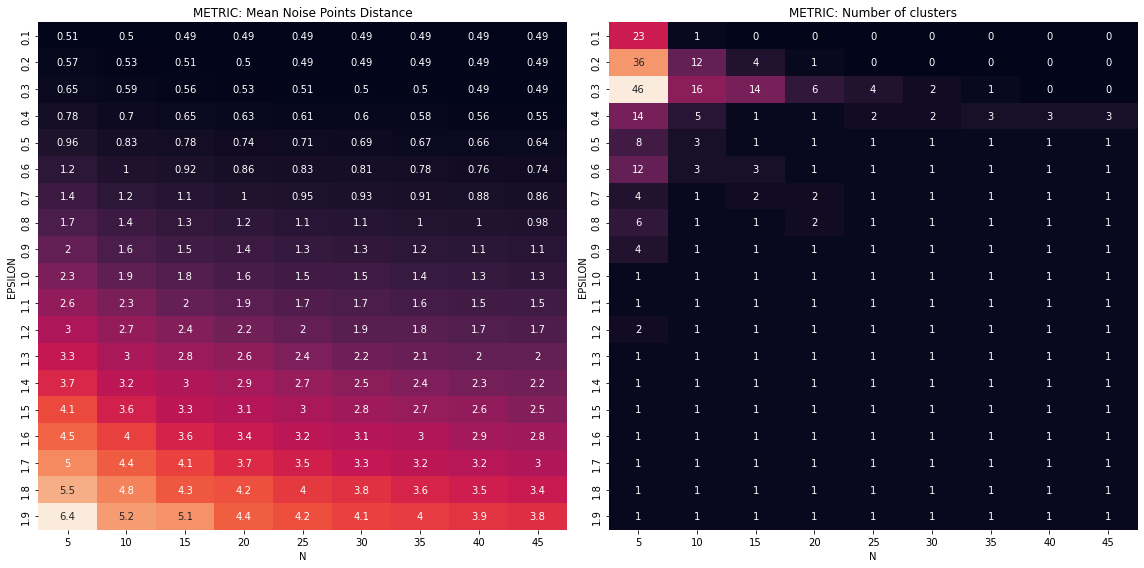

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [111]:
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])

<BarContainer object of 3 artists>

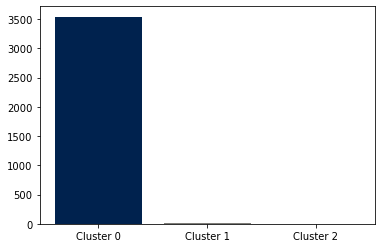

In [112]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2])], color=['#00224e','#7d7c78','#01224e'])

<h3> ALTRO METODO </h3>

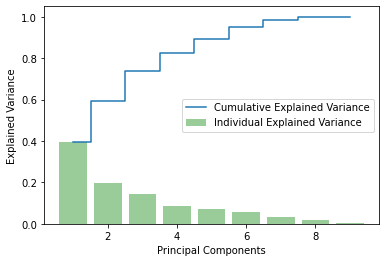

In [113]:
scaler = StandardScaler()
std_cust = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_cust)

plt.step(range(1, df.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');


In [114]:
pca = PCA(n_components=2)
pca_customer_profile = pca.fit_transform(std_cust)

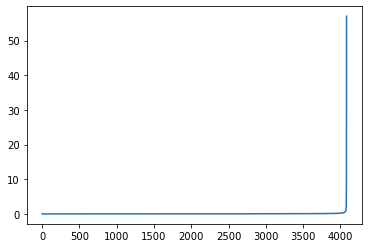

In [115]:
knn = NearestNeighbors(n_neighbors=6)
nbrs = knn.fit(pca_customer_profile)
distances, indices = nbrs.kneighbors(pca_customer_profile)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances);

plt.savefig('D:/Desktop/DataMining/cust_knn.png')

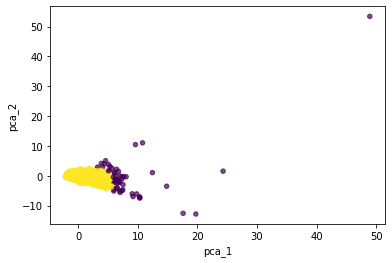

In [116]:
dbscan = DBSCAN(eps=0.8, min_samples=15)
clusters_customers = dbscan.fit_predict(pca_customer_profile)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

plt.savefig('D:/Desktop/DataMining/cust_dbscan.png')

In [117]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

,-1,0
CustomersNb,58,4024


In [118]:
clust_list = list()
for i in range(len(df['LABEL'].unique())):
    clust_list.append(df[df['LABEL'] == i])

<BarContainer object of 3 artists>

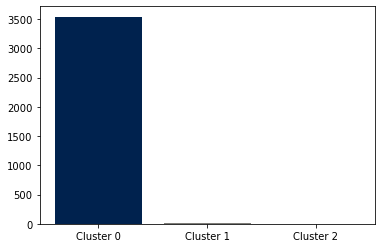

In [119]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2])], color=['#00224e','#7d7c78','#01224e'])

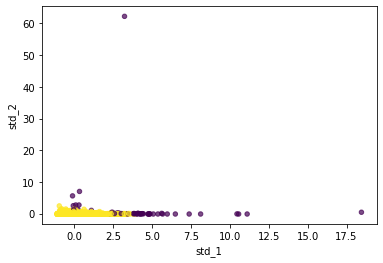

In [121]:
#no pca
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_cust[:, 0], std_cust[:, 1], c=clusters_customers, s=20, alpha=0.7);